<a href="https://colab.research.google.com/github/yulyrod95/machinelearning-az/blob/master/Desafio6_Anahuac.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DESAFIO 6 : ANAHUAC BEHIND THE CODE

## Importar librerias y dataset

In [14]:
!pip install scikit-learn --upgrade
!pip install xgboost --upgrade
import pandas as pd
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/dataset2/master/datasets/ForTraining.csv
df_base_for_training = pd.read_csv(r'ForTraining.csv')

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.23.2)
Requirement already up-to-date: xgboost in /usr/local/lib/python3.6/dist-packages (1.2.0)
--2020-09-15 00:56:35--  https://raw.githubusercontent.com/vanderlei-test/dataset2/master/datasets/ForTraining.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 92376 (90K) [text/plain]
Saving to: ‘ForTraining.csv.1’

ForTraining.csv.1   100%[===================>]  90.21K  --.-KB/s    in 0.009s  

2020-09-15 00:56:36 (10.2 MB/s) - ‘ForTraining.csv.1’ saved [92376/92376]



In [15]:
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/dataset2/master/datasets/OrdenMaterias.csv
df_orden_materias = pd.read_csv(r'OrdenMaterias.csv')

--2020-09-15 00:56:36--  https://raw.githubusercontent.com/vanderlei-test/dataset2/master/datasets/OrdenMaterias.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63920 (62K) [text/plain]
Saving to: ‘OrdenMaterias.csv.1’

OrdenMaterias.csv.1 100%[===================>]  62.42K  --.-KB/s    in 0.008s  

2020-09-15 00:56:36 (7.87 MB/s) - ‘OrdenMaterias.csv.1’ saved [63920/63920]



In [16]:
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/dataset2/master/datasets/TablaConexiones.csv
df_tabla_conexiones = pd.read_csv(r'TablaConexiones.csv')

--2020-09-15 00:56:36--  https://raw.githubusercontent.com/vanderlei-test/dataset2/master/datasets/TablaConexiones.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 243492 (238K) [text/plain]
Saving to: ‘TablaConexiones.csv.1’

TablaConexiones.csv 100%[===================>] 237.79K  --.-KB/s    in 0.02s   

2020-09-15 00:56:36 (13.0 MB/s) - ‘TablaConexiones.csv.1’ saved [243492/243492]



In [17]:
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/dataset2/master/datasets/TablaTareas.csv
df_tabla_tareas = pd.read_csv(r'TablaTareas.csv')

--2020-09-15 00:56:40--  https://raw.githubusercontent.com/vanderlei-test/dataset2/master/datasets/TablaTareas.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 310923 (304K) [text/plain]
Saving to: ‘TablaTareas.csv.1’

TablaTareas.csv.1   100%[===================>] 303.64K  --.-KB/s    in 0.02s   

2020-09-15 00:56:41 (14.7 MB/s) - ‘TablaTareas.csv.1’ saved [310923/310923]



In [18]:
import IPython
def all_tables(*dfs):
    for df in dfs:
        IPython.display.display(df)
all_tables(df_base_for_training, df_orden_materias, df_tabla_conexiones, df_tabla_tareas)

,studentId,reducido,ciclo,Graduado
0,88588.0,Interv. Edu.,2019 - 08,No
1,81135.0,Educacion,2019 - 05,Si
2,80926.0,Direc. Estrat. Neg,2019 - 05,Si
3,82415.0,B. I.,2019 - 06,Si
4,90082.0,Est. Temprana,2019 - 08,No
...,...,...,...,...
2495,89685.0,Estrat. Comercial,2019 - 08,No
2496,77590.0,Crianza Hijos,2019 - 06,Si
2497,57623.0,Mercadotecnia,2018 - 02,Si
2498,50018.0,Lider. Inst. Edu.,2017 - 05,No


,reducido,2017 - 03,2017 - 04,2017 - 05,2017 - 06,2017 - 07,2017 - 08,2018 - 01,2018 - 02,2018 - 03,2018 - 04,2018 - 05,2018 - 06,2018 - 07,2018 - 08,2019 - 01,2019 - 02,2019 - 03,2019 - 04,2019 - 05,2019 - 06,2019 - 07,2019 - 08,2020 - 01,2020 - 02,2020 - 03,2020 - 04,2020 - 05,2020 - 06
0,Act. Derecho Contratual,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Consentimiento y objeto digital contractual,Métodos alternos de resolución de controversias,Nueva clasificación contractual,Nuevo derecho probatorio documental,Contratos inteligentes,Consentimiento y objeto digital contractual
1,Adm. Emp.,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Mercadotecnia Estratégica,Contabilidad Financiera y Presupuestos,Administración de costos,Impuestos,Desafíos actuales en la Dirección del Capital ...,Mercadotecnia Estratégica,Contabilidad Financiera y Presupuestos,Administración de costos,Impuestos,Desafíos actuales en la Dirección del Capital ...
2,Adm. Riesgos,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Riesgos empresariales,Contabilidad Financiera y Presupuestos,Administración de riesgos,Evaluación de Riesgos,Toma de Decisiones,Riesgos empresariales,Contabilidad Financiera y Presupuestos,Administración de riesgos,Evaluación de Riesgos,Toma de Decisiones
3,Adm. Salud,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Calidad en salud,Contabilidad Financiera y Presupuestos,Administración de costos,Salud pública,Planeación estratégica en salud,Calidad en salud,Contabilidad Financiera y Presupuestos,Planeación estratégica en salud,Salud pública,Planeación estratégica en salud
4,Admon Fin.,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Decisión y Análisis de Inversión,Decisión de Financiamiento y Pago de Dividendos,Análisis de Estados Financieros,Estrategias de negocios,Planeación Financiera y Administración del Cap...,Decisión y Análisis de Inversión,Decisión de Financiamiento y Pago de Dividendos,Análisis de Estados Financieros,Estrategias de negocios,Planeación Financiera y Administración del Cap...,Decisión y Análisis de Inversión,Decisión de Financiamiento y Pago de Dividendos,Análisis de Estados Financieros,Estrategias de negocios,Planeación Financiera y Administración del Cap...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,Transf. Globales,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Tendencia de las organizaciones,Sin clase,Sociedad de la Información,Mercados globales y consecuencias,Mercados globales y consecuencias,Paz y Seguridad Internacionales,Tendencia de las organizaciones,Sociedad de la Información
111,Transparencia,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Generalidades y clasificación de la corrupcción,Generalidades y clasificación de la corrupcción,La actuación ética y responsabilidad administr...,Conductas delictivas asociadas a la corrupción,Corrupción en las empresas,El Sistema Nacional y Estatal Anticorrupción
112,Trastornos Alimen.,Sin clase,Sin clase,Sin clase,Sin clase,S

,studentId,ciclo,Dias_Conectado,Minutos_Promedio,Minutos_Total
0,45870,2017 - 03,10.0,76.957000,769.57
1,45898,2017 - 03,32.0,370.231250,11847.40
2,45905,2017 - 03,50.0,198.717400,9935.87
3,45931,2017 - 03,22.0,294.535909,6479.79
4,45933,2017 - 03,18.0,177.991667,3203.85
...,...,...,...,...,...
4491,91335,2019 - 08,102.0,256.105686,26122.78
4492,91345,2019 - 08,6.0,14.650000,87.90
4493,91346,2019 - 08,26.0,230.841538,6001.88
4494,91414,2019 - 08,46.0,257.319130,11836.68


,studentId,ciclo,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas
0,81328.0,2019 - 05,99.000000,10.0,0.0,0.0,10.0
1,99206.0,2020 - 02,80.777500,10.0,2.0,0.0,12.0
2,94582.0,2020 - 01,79.666000,10.0,0.0,0.0,10.0
3,87564.0,2019 - 07,0.000000,0.0,15.0,0.0,15.0
4,87971.0,2019 - 08,36.363636,5.0,6.0,0.0,11.0
...,...,...,...,...,...,...,...
6293,80467.0,2019 - 05,20.000000,1.0,4.0,0.0,5.0
6294,80249.0,2019 - 05,50.600000,3.0,2.0,0.0,5.0
6295,85857.0,2019 - 07,81.428571,13.0,1.0,0.0,14.0
6296,98880.0,2020 - 02,91.212727,11.0,0.0,0.0,11.0


## Transformacion de tabla orden materias

In [19]:
df3 = pd.get_dummies(df_orden_materias, columns=['2017 - 03','2017 - 04','2017 - 05','2017 - 06','2017 - 07','2017 - 08','2018 - 01','2018 - 02',
                                                 '2018 - 03','2018 - 04','2018 - 05','2018 - 06','2018 - 07','2018 - 08','2019 - 01','2019 - 02',
                                                 '2019 - 03','2019 - 04','2019 - 05','2019 - 06','2019 - 07','2019 - 08','2020 - 01','2020 - 02',
                                                 '2020 - 03','2020 - 04','2020 - 05','2020 - 06'
                                                ])

In [20]:
df4 = df3.drop(columns=['2017 - 03_Sin clase','2017 - 04_Sin clase','2017 - 05_Sin clase','2017 - 06_Sin clase','2017 - 07_Sin clase',
                        '2017 - 08_Sin clase','2018 - 01_Sin clase','2018 - 02_Sin clase','2018 - 03_Sin clase','2018 - 04_Sin clase',
                        '2018 - 05_Sin clase','2018 - 06_Sin clase','2018 - 07_Sin clase','2018 - 08_Sin clase','2019 - 01_Sin clase',
                        '2019 - 02_Sin clase','2019 - 03_Sin clase','2019 - 04_Sin clase','2019 - 05_Sin clase','2019 - 06_Sin clase',
                        '2019 - 07_Sin clase','2019 - 08_Sin clase','2020 - 01_Sin clase','2020 - 02_Sin clase',
                        '2020 - 03_Sin clase','2020 - 04_Sin clase','2020 - 05_Sin clase','2020 - 06_Sin clase'], inplace=False)

In [22]:
col_list= list(df4)
col_list.remove('reducido')
df4['materias'] = df4[col_list].sum(axis=1)

In [23]:
a=806
for i in range(0, 806):
    df4= df4.drop(df4.columns[a], axis='columns')
    a=a-1

In [24]:
df4

,reducido,materias
0,Act. Derecho Contratual,12
1,Adm. Emp.,20
2,Adm. Riesgos,20
3,Adm. Salud,20
4,Admon Fin.,30
...,...,...
110,Transf. Globales,14
111,Transparencia,12
112,Trastornos Alimen.,18
113,Ventas Estrat.,32


## Uniendo Dataframes en Pandas

In [25]:
df5 = pd.merge(
    df_base_for_training, df_tabla_tareas, how='inner',
    on=None, left_on=['studentId', 'ciclo'], right_on=['studentId', 'ciclo'],
    left_index=False, right_index=False, sort=True,
    suffixes=('_x', '_y'), copy=True, indicator=False,
    validate=None
)

In [26]:
df6 = pd.merge(
    df5, df_tabla_conexiones, how='inner',
    on=None, left_on=['studentId', 'ciclo'], right_on=['studentId', 'ciclo'],
    left_index=False, right_index=False, sort=True,
    suffixes=('_x', '_y'), copy=True, indicator=False,
    validate=None
)

In [27]:
df7 = pd.merge(
    df4, df6, how='inner',
    on=None, left_on=['reducido'], right_on=['reducido'],
    left_index=False, right_index=False, sort=True,
    suffixes=('_x', '_y'), copy=True, indicator=False,
    validate=None
)
df7.tail()

,reducido,materias,studentId,ciclo,Graduado,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas,Dias_Conectado,Minutos_Promedio,Minutos_Total
2495,Ventas Estrat.,32,85763.0,2019 - 07,Si,88.333,10.0,0.0,0.0,10.0,148.0,286.697703,42431.26
2496,Ventas Estrat.,32,85829.0,2019 - 07,Si,93.666,10.0,0.0,0.0,10.0,88.0,279.133636,24563.76
2497,Ventas Estrat.,32,86369.0,2019 - 07,Si,91.000,10.0,0.0,0.0,10.0,51.0,223.795686,11413.58
2498,Ventas Estrat.,32,86638.0,2019 - 07,No,73.667,8.0,2.0,0.0,10.0,51.0,236.741176,12073.80
2499,Ventas Estrat.,32,89630.0,2019 - 08,Si,76.444,10.0,0.0,0.0,10.0,53.0,211.406604,11204.55


## Variables categoricas

In [75]:
df9 = pd.get_dummies(df7, columns=['ciclo', 'Graduado'])
df9.tail()

,reducido,materias,studentId,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas,Dias_Conectado,Minutos_Promedio,Minutos_Total,ciclo_2017 - 03,ciclo_2017 - 04,ciclo_2017 - 05,ciclo_2017 - 06,ciclo_2017 - 07,ciclo_2017 - 08,ciclo_2018 - 01,ciclo_2018 - 02,ciclo_2018 - 03,ciclo_2018 - 04,ciclo_2018 - 05,ciclo_2018 - 06,ciclo_2018 - 07,ciclo_2018 - 08,ciclo_2019 - 01,ciclo_2019 - 02,ciclo_2019 - 03,ciclo_2019 - 04,ciclo_2019 - 05,ciclo_2019 - 06,ciclo_2019 - 07,ciclo_2019 - 08,Graduado_No,Graduado_Si
2495,Ventas Estrat.,32,85763.0,88.333,10.0,0.0,0.0,10.0,148.0,286.697703,42431.26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2496,Ventas Estrat.,32,85829.0,93.666,10.0,0.0,0.0,10.0,88.0,279.133636,24563.76,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2497,Ventas Estrat.,32,86369.0,91.000,10.0,0.0,0.0,10.0,51.0,223.795686,11413.58,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2498,Ventas Estrat.,32,86638.0,73.667,8.0,2.0,0.0,10.0,51.0,236.741176,12073.80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2499,Ventas Estrat.,32,89630.0,76.444,10.0,0.0,0.0,10.0,53.0,211.406604,11204.55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


## Quitar columnas

In [76]:
df10 = df9.drop(columns=['reducido','studentId','ciclo_2019 - 08','Graduado_No'], inplace=False)

## Clasificar el modelo

In [149]:
features = df10[
    [
      'materias', 
        'Calificacion_Promedio', 
        'Tareas_Puntuales',
       'Tareas_No_Entregadas', 'Tareas_Retrasadas', 
        'Total_Tareas',
       'Dias_Conectado', 'Minutos_Promedio', 'Minutos_Total',
       'ciclo_2017 - 03', 'ciclo_2017 - 04', 
        'ciclo_2017 - 05',
       'ciclo_2017 - 06', 
        'ciclo_2017 - 07', 
        'ciclo_2017 - 08',
       'ciclo_2018 - 01', 'ciclo_2018 - 02', 'ciclo_2018 - 03',
       'ciclo_2018 - 04', 'ciclo_2018 - 05', 
        'ciclo_2018 - 06',
       'ciclo_2018 - 07', 'ciclo_2018 - 08', 'ciclo_2019 - 01',
       'ciclo_2019 - 02', 'ciclo_2019 - 03', 
        'ciclo_2019 - 04',
       'ciclo_2019 - 05', 'ciclo_2019 - 06', 'ciclo_2019 - 07'
    ]
]
target = df10['Graduado_Si']  ## No cambie la variable target!

In [150]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0) #133

In [151]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [152]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [170]:
# Inicializar la RNA
classifier = Sequential()

In [171]:
# Añadir las capas de entrada y primera capa oculta
classifier.add(Dense(units = 15, kernel_initializer = "uniform",  
                     activation = "relu", input_dim = 30))

In [172]:
# Añadir la segunda capa oculta
classifier.add(Dense(units = 15, kernel_initializer = "uniform",  activation = "relu"))

In [173]:
# Añadir la capa de salida
classifier.add(Dense(units = 1, kernel_initializer = "uniform",  activation = "sigmoid"))

In [174]:
# Compilar la RNA
classifier.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
#binary_cross

In [175]:
# Ajustamos la RNA al Conjunto de Entrenamiento
classifier.fit(X_train, y_train,  batch_size = 10, epochs = 100)

Epoch 1/100
200/200 [==============================] - 0s 1ms/step - loss: 0.5817 - accuracy: 0.7290
Epoch 2/100
200/200 [==============================] - 0s 1ms/step - loss: 0.4143 - accuracy: 0.8040
Epoch 3/100
200/200 [==============================] - 0s 1ms/step - loss: 0.4041 - accuracy: 0.8145
Epoch 4/100
200/200 [==============================] - 0s 1ms/step - loss: 0.3985 - accuracy: 0.8080
Epoch 5/100
200/200 [==============================] - 0s 1ms/step - loss: 0.3942 - accuracy: 0.8125
Epoch 6/100
200/200 [==============================] - 0s 1ms/step - loss: 0.3911 - accuracy: 0.8185
Epoch 7/100
200/200 [==============================] - 0s 1ms/step - loss: 0.3887 - accuracy: 0.8170
Epoch 8/100
200/200 [==============================] - 0s 1ms/step - loss: 0.3874 - accuracy: 0.8195
Epoch 9/100
200/200 [==============================] - 0s 1ms/step - loss: 0.3851 - accuracy: 0.8210
Epoch 10/100
200/200 [==============================] - 0s 1ms/step - loss: 0.3823 - accura

In [176]:
y_pred  = classifier.predict(X_test)

In [177]:
# redondeamos las predicciones
y_pred = [round(x[0]) for x in y_pred]
print(y_pred)

[1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0,

In [178]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[189,  61],
       [ 30, 220]])

Text(0.5, 15.0, 'Predicted label\n\nAccuracy=0.818\nPrecision=0.783\nRecall=0.880\nF1 Score=0.8286252354048964')

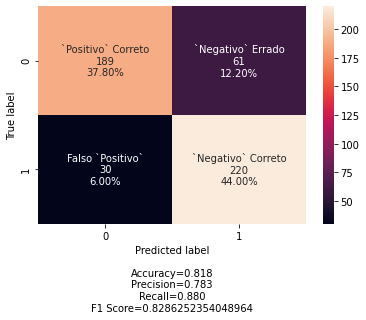

In [179]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


cf_matrix = confusion_matrix(y_test, y_pred)
group_names = ['`Positivo` Correto', '`Negativo` Errado', 'Falso `Positivo`', '`Negativo` Correto']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
accuracy  = np.trace(cf_matrix) / float(np.sum(cf_matrix))
precision = cf_matrix[1,1] / sum(cf_matrix[:,1])
recall    = cf_matrix[1,1] / sum(cf_matrix[1,:])
f1_score  = 2*precision*recall / (precision + recall)
sns.heatmap(cf_matrix, annot=labels, fmt="")
stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={}".format(accuracy, precision, recall, f1_score)
plt.ylabel('True label')
plt.xlabel('Predicted label' + stats_text)

In [168]:
a=499
for i in range(0, 499):
    if y_pred[i]== 1:
      y_pred[i]='Si'
    elif y_pred[i]== 0:
      y_pred[i]='No'

In [169]:
y_pred

['Si',
 'No',
 'No',
 'Si',
 'Si',
 'Si',
 'Si',
 'No',
 'No',
 'Si',
 'Si',
 'No',
 'No',
 'No',
 'Si',
 'Si',
 'No',
 'No',
 'Si',
 'No',
 'No',
 'No',
 'No',
 'Si',
 'Si',
 'Si',
 'No',
 'Si',
 'No',
 'No',
 'No',
 'Si',
 'Si',
 'No',
 'Si',
 'Si',
 'No',
 'Si',
 'Si',
 'Si',
 'Si',
 'Si',
 'No',
 'Si',
 'Si',
 'No',
 'Si',
 'Si',
 'Si',
 'No',
 'No',
 'Si',
 'No',
 'Si',
 'No',
 'Si',
 'No',
 'Si',
 'Si',
 'Si',
 'No',
 'Si',
 'Si',
 'Si',
 'No',
 'Si',
 'No',
 'No',
 'Si',
 'Si',
 'No',
 'Si',
 'No',
 'Si',
 'Si',
 'Si',
 'No',
 'No',
 'Si',
 'Si',
 'Si',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'Si',
 'No',
 'No',
 'Si',
 'Si',
 'Si',
 'No',
 'No',
 'Si',
 'Si',
 'No',
 'No',
 'Si',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'Si',
 'No',
 'No',
 'No',
 'Si',
 'No',
 'No',
 'Si',
 'Si',
 'No',
 'Si',
 'No',
 'No',
 'No',
 'Si',
 'Si',
 'Si',
 'No',
 'No',
 'Si',
 'Si',
 'No',
 'Si',
 'Si',
 'No',
 'Si',
 'Si',
 'No',
 'Si',
 'Si',
 'Si',
 'Si',
 'Si',
 'No',
 'No',
 'No',
 'No',